### How many items are returned by the `load_iris` function? What are they?

With the load_iris function everything about this iris dataset, which includes the attribute information, summary statistics for each feature, author, and the actual data. 

### What is being used as the target in each of three regression plots below?

Petal width (cm)

### Which of the three linear models fit is the best according to the Mean Squared Error?

Petal length (cm)

# Supervised and Unsupervised Learning

We think of a given dataset upon which we are working as a representation of some actual phenomenon. As data scientists, we seek a function, $\widehat{f}$ ("eff hat"), that we can use to approximate this actual phenomenon. We may take different approaches in developing this $\widehat{f}$.

In some cases, we have a set of input data, often called **features**, inputs, or independent variables, and we believe that these features can be uses to predict a **target**, output or dependent variable. If we seek to develop a model that fits a set of features to a target, this is known as **Supervised Learning**. The supervision comes from the fact that the targets or outputs are known. If the target consists of elements coming from a finite set of discrete categories e.g. $\{red, blue, green\}$, $\{heads, tails\}$, then we say that the task is a **classification** task and our $\widehat{f}$ is a classfication model. If the target consists of elements coming from a continuous range of values e.g. *Age* or *SalePrice*, then we say that the task is a **regression** task and our $\widehat{f}$ is a regression model.

**NOTE**: The reasoning behind the name "regression" is historical and is not consistent with the colloquial meaning of the word.

In other cases, we might seek to develop a model from a set of features without any corresponding target data. This type of model development is known as **Unsupervised Learning**. It is unsupervised because the targets are unknown. Common unsupervised learning tasks are **clustering**, in which we attempt to assign our data to a finite number of groups, and **dimensionality reduction**.

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rc('figure', figsize=(20, 6))

In [2]:
IRIS = load_iris()

feat_names = IRIS.feature_names

iris_df = pd.DataFrame(IRIS.data, columns=feat_names)

IRIS.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [20]:
load_iris()

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

### Regression

In [5]:
list(range(3))

[0, 1, 2]

In [4]:
feat_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

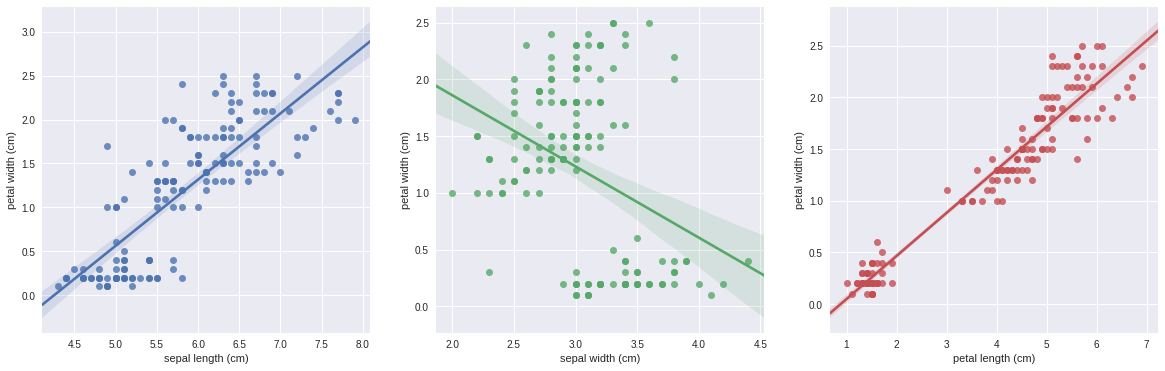

In [3]:
_, ax = plt.subplots(1,3, figsize=(20,6))

for i in range(3):
    sns.regplot(feat_names[i], feat_names[3], 
                data=iris_df, ax=ax[i])

In [10]:
list_a = [1,2,3]
list_b = ['a','b','c']

list(zip(list_a, list_b))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [12]:
for a, b in zip(list_a, list_b):
    print('num:', a)
    print('str:', b)
    print('END ITERATION')
    print('')

num: 1
str: a
END ITERATION

num: 2
str: b
END ITERATION

num: 3
str: c
END ITERATION



In [13]:
first_three_features = feat_names[:3]
first_three_features

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']

In [14]:
from sklearn.linear_model import LinearRegression
linear_models = [LinearRegression(),
                 LinearRegression(),
                 LinearRegression()]
for feature, model in zip(feat_names[:3], linear_models):
    print("Fitting %s on petal width (cm) with linear regression." % feature)
    features = iris_df[[feature]]
    target = iris_df['petal width (cm)']
    model.fit(features, target)

Fitting sepal length (cm) on petal width (cm) with linear regression.
Fitting sepal width (cm) on petal width (cm) with linear regression.
Fitting petal length (cm) on petal width (cm) with linear regression.


### Evaluate the Regression Models Using Mean Squared Error

In [16]:
def MSE(actual, predicted):
    return sum((actual - predicted)**2)/len(actual)

In [17]:
for feature, model in zip(feat_names[:3], linear_models):
    features = iris_df[[feature]]
    target = iris_df['petal width (cm)']
    print("Scoring linear regression model fit with %s." % feature)
    print("MSE: %f" % MSE(target, model.predict(features)))

Scoring linear regression model fit with sepal length (cm).
MSE: 0.191466
Scoring linear regression model fit with sepal width (cm).
MSE: 0.504986
Scoring linear regression model fit with petal length (cm).
MSE: 0.042290
